In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import konlpy
okt = Okt()

In [2]:
import pandas as pd

# c = pd.read_csv('/Users/ijunhui/Downloads/ubion/해커톤/kakao_2206.csv')
c = pd.read_csv("C:/PYTHON/G_ML/해커톤/kakao_2206.csv")
c

,전체날짜,종목명,제목,본문
0,2022.06.01 05:23,카카오,이시간에 카카오메인이 조선이 싹쓸이하네...,메인 7개 뉴스중에 5개가 조선1개가 동아 1개가 듣보잡 인터넷언론....이러니 주...
1,2022.06.01 08:44,카카오,돈은 많이 받으면서,근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 tv보면서 근무하고...
2,2022.06.01 08:59,카카오,유영두 할아버지 넘 실망이에요~~^^,"토른방에 남겨진 유영두 할아버지에 대한 댓글 입니다.\n""범수 똘마니 의심 ""\n""..."
3,2022.06.01 09:29,카카오,빡빡이 하는짓 보면 모르나,김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 먹을려고 하는거지\n\n카...
4,2022.06.01 09:37,카카오,한오백년 전쟁하자는 미필 양키괴뢰!!!,"우리는 원래 하나였으나, 미,소에 의해 강제로 분단 당했습니다.\n피눈물도 없다는 ..."
...,...,...,...,...
6615,2022.06.30 23:31,카카오,이거보고 윤석열이 왕따라고 생각하면,https://youtu.be/C2-HTUyE6Y4\n\n당신은 천재ㅋㅋㅋ 왕따 아...
6616,2022.06.30 23:34,카카오,잠이 안온다,내일 인버스에 얼마나 꽂힐지..돈복사
6617,2022.06.30 23:40,카카오,이거 액분전에 평균얼마엿어요,궁금합니다
6618,2022.06.30 23:52,카카오,나스닥 7천,간다.\n\n카카오는 3만 간다.\n\nㅋㅋ


In [3]:
c['제목+본문'] = c['제목'] + c['본문']

print(len(c['제목+본문'])) # 리뷰 개수 출력
c.head()


6620


,전체날짜,종목명,제목,본문,제목+본문
0,2022.06.01 05:23,카카오,이시간에 카카오메인이 조선이 싹쓸이하네...,메인 7개 뉴스중에 5개가 조선1개가 동아 1개가 듣보잡 인터넷언론....이러니 주...,이시간에 카카오메인이 조선이 싹쓸이하네...메인 7개 뉴스중에 5개가 조선1개가 동...
1,2022.06.01 08:44,카카오,돈은 많이 받으면서,근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 tv보면서 근무하고...,돈은 많이 받으면서근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 ...
2,2022.06.01 08:59,카카오,유영두 할아버지 넘 실망이에요~~^^,"토른방에 남겨진 유영두 할아버지에 대한 댓글 입니다.\n""범수 똘마니 의심 ""\n""...",유영두 할아버지 넘 실망이에요~~^^토른방에 남겨진 유영두 할아버지에 대한 댓글 입...
3,2022.06.01 09:29,카카오,빡빡이 하는짓 보면 모르나,김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 먹을려고 하는거지\n\n카...,빡빡이 하는짓 보면 모르나김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 ...
4,2022.06.01 09:37,카카오,한오백년 전쟁하자는 미필 양키괴뢰!!!,"우리는 원래 하나였으나, 미,소에 의해 강제로 분단 당했습니다.\n피눈물도 없다는 ...","한오백년 전쟁하자는 미필 양키괴뢰!!!우리는 원래 하나였으나, 미,소에 의해 강제로..."


In [4]:
print(c['제목+본문'].isnull().values.any())


False


In [5]:
train_data = c['제목+본문'].dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
train_data

False


0       이시간에 카카오메인이 조선이 싹쓸이하네...메인 7개 뉴스중에 5개가 조선1개가 동...
1       돈은 많이 받으면서근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 ...
2       유영두 할아버지 넘 실망이에요~~^^토른방에 남겨진 유영두 할아버지에 대한 댓글 입...
3       빡빡이 하는짓 보면 모르나김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 ...
4       한오백년 전쟁하자는 미필 양키괴뢰!!!우리는 원래 하나였으나, 미,소에 의해 강제로...
                              ...                        
6615    이거보고 윤석열이 왕따라고 생각하면https://youtu.be/C2-HTUyE6Y...
6616                           잠이 안온다내일 인버스에 얼마나 꽂힐지..돈복사
6617                                 이거 액분전에 평균얼마엿어요궁금합니다
6618                       나스닥 7천간다.\n\n카카오는 3만 간다.\n\nㅋㅋ
6619                카카오 계열사이 쉐리들은 왜 배당을 안줌? 생각할수록 아주 괘씸하네
Name: 제목+본문, Length: 6620, dtype: object

In [6]:
train_data = train_data.astype(str)          # str 로 타입변경
train_data


0       이시간에 카카오메인이 조선이 싹쓸이하네...메인 7개 뉴스중에 5개가 조선1개가 동...
1       돈은 많이 받으면서근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 ...
2       유영두 할아버지 넘 실망이에요~~^^토른방에 남겨진 유영두 할아버지에 대한 댓글 입...
3       빡빡이 하는짓 보면 모르나김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 ...
4       한오백년 전쟁하자는 미필 양키괴뢰!!!우리는 원래 하나였으나, 미,소에 의해 강제로...
                              ...                        
6615    이거보고 윤석열이 왕따라고 생각하면https://youtu.be/C2-HTUyE6Y...
6616                           잠이 안온다내일 인버스에 얼마나 꽂힐지..돈복사
6617                                 이거 액분전에 평균얼마엿어요궁금합니다
6618                       나스닥 7천간다.\n\n카카오는 3만 간다.\n\nㅋㅋ
6619                카카오 계열사이 쉐리들은 왜 배당을 안줌? 생각할수록 아주 괘씸하네
Name: 제목+본문, Length: 6620, dtype: object

In [7]:
train_data = train_data.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")          # 한글 정제

<ipython-input-7-afbbcaf8216e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data = train_data.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")          # 한글 정제


In [8]:
train_data # 상위 5개 출력


0       이시간에 카카오메인이 조선이 싹쓸이하네메인 개 뉴스중에 개가 조선개가 동아 개가 듣...
1       돈은 많이 받으면서근무시간에 오디오라인 열어놓는게 불만이라니그냥 집에서 누워서 보면...
2       유영두 할아버지 넘 실망이에요토른방에 남겨진 유영두 할아버지에 대한 댓글 입니다범수...
3       빡빡이 하는짓 보면 모르나김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 ...
4       한오백년 전쟁하자는 미필 양키괴뢰우리는 원래 하나였으나 미소에 의해 강제로 분단 당...
                              ...                        
6615    이거보고 윤석열이 왕따라고 생각하면당신은 천재ㅋㅋㅋ 왕따 아니라고 생각하면 당신은 ...
6616                             잠이 안온다내일 인버스에 얼마나 꽂힐지돈복사
6617                                 이거 액분전에 평균얼마엿어요궁금합니다
6618                                   나스닥 천간다카카오는 만 간다ㅋㅋ
6619                 카카오 계열사이 쉐리들은 왜 배당을 안줌 생각할수록 아주 괘씸하네
Name: 제목+본문, Length: 6620, dtype: object

In [9]:
train_data.to_excel('C:/PYTHON/G_ML/해커톤/train_data.xlsx')

# 출처: https://seong6496.tistory.com/114 [파이프마임:티스토리]

In [11]:
# 불용어 정의
#stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 한국어 약식 불용어 사전 다운로드
# - https://www.ranks.nl/stopwords/korean
# - 텍스트 파일로 저장

korean_stopwors_path = "C:/PYTHON/G_ML/해커톤/korean_stopword.txt"

# 불용어 텍스트 파일 오픈
with open (korean_stopwors_path, encoding= 'utf8') as f : 
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]


# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in (train_data):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    
    t_s = []                                             # 한 글자 단어 제거
    for i in range(len(tokenized_sentence)):
        if len(tokenized_sentence[i]) > 1:               
            t_s.append(tokenized_sentence[i])
        
    stopwords_removed_sentence = [word for word in t_s if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

In [16]:
tokenized_data['본문'].to_string()

TypeError: list indices must be integers or slices, not str

In [12]:
tokenized_data

[['카카오',
  '메인',
  '조선',
  '쓸다',
  '메인',
  '뉴스',
  '조선',
  '동아',
  '듣보잡',
  '인터넷',
  '언론',
  '이러니',
  '주가',
  '모양',
  '이지'],
 ['많이',
  '받다',
  '근무시간',
  '오디오',
  '라인',
  '열다',
  '불만',
  '이라니',
  '그냥',
  '눕다',
  '보다',
  '근무',
  '하고',
  '싶다',
  '그냥',
  '출근',
  '주가',
  '반토막',
  '나다',
  '성과급',
  '이랑',
  '월급',
  '인상',
  '하다',
  '꼬박꼬박',
  '받다',
  '불만',
  '졸라',
  '많다'],
 ['유영',
  '할아버지',
  '넘다',
  '실망',
  '이에요',
  '토른방',
  '남겨지다',
  '유영',
  '할아버지',
  '대한',
  '댓글',
  '이다',
  '범수',
  '똘마',
  '의심',
  '생기다',
  '사기꾼',
  '방송',
  '보다',
  '사기꾼',
  '인지',
  '모르다',
  '주식',
  '접다',
  '이렇다',
  '댓글',
  '보다',
  '할아버지',
  '너무',
  '실망',
  '크다',
  '할아버지',
  '이렇다',
  '댓글',
  '증말',
  '사실',
  '아니다',
  '할아버지',
  '믿다'],
 ['빡빡이',
  '하다',
  '보다',
  '모르다',
  '김범수',
  '일구다',
  '내다',
  '자리',
  '편하다',
  '앉다',
  '메타',
  '버스',
  '빌다',
  '미로',
  '날로',
  '먹다',
  '하다',
  '카카오',
  '대표',
  '빡빡이',
  '바뀌다',
  '직원',
  '불리다',
  '하다',
  '개선',
  '되다',
  '하다'],
 ['백년',
  '전쟁',
  '하다',
  '미필',
  '양키',
  '괴뢰',
  '원래',
  '이다',
  '미소',
  

In [14]:
tokenized_data.to_excel('C:/PYTHON/G_ML/해커톤/tokenized_data.xlsx')


AttributeError: 'list' object has no attribute 'to_excel'

리뷰의 최대 길이 : 691
리뷰의 평균 길이 : 17.95453172205438


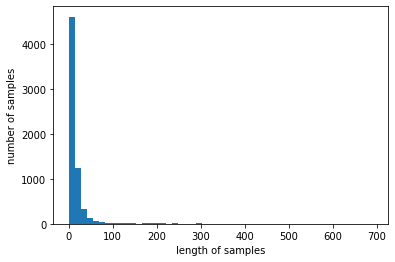

In [11]:
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [12]:
from gensim.models import Word2Vec

#model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

# Word2Vec으로 토큰화 된 데이터 학습

model = Word2Vec(sentences   = tokenized_data, 
                 #size       = 100,         # 벡터의 차원 수. 즉, 단어 당 만들어질 벡터의 크기
                 vector_size = 100,         ### error 나서 수정했음!!
                 window    = 5,             # 컨텍스트 윈도우 크기(기본값 5 = 좌우 5개)
                 min_count = 5,             # 단어 최소 빈도 수 제한 = 빈도가 적은 단어들은 학습하지 않음
                 workers   = 4,             # 학습을 위한 프로세스 수
                 sg        = 0)             # 훈련 알고리즘 적용 => 0은 CBOW, 1은 Skip-gram

# TypeError: Word2Vec.__init__() got an unexpected keyword argument 'size'

In [16]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(3388, 100)

In [19]:
#print(model.wv.most_similar("카카오"))
sw = model.wv.most_similar("카카오", topn = 1000)
sw

[('페이', 0.9982118010520935),
 ('뱅크', 0.9980241060256958),
 ('모빌리티', 0.9936553835868835),
 ('적정', 0.9914427995681763),
 ('상장', 0.9910891652107239),
 ('주가', 0.9895080327987671),
 ('매각', 0.989113986492157),
 ('게임', 0.9884943962097168),
 ('회사', 0.9871155023574829),
 ('분할', 0.9870606660842896),
 ('삼성', 0.9868889451026917),
 ('주주', 0.9862771034240723),
 ('엘지', 0.9862357974052429),
 ('열사', 0.9849264621734619),
 ('에스', 0.9849256277084351),
 ('지주', 0.984281599521637),
 ('거품', 0.9841709733009338),
 ('셀트리온', 0.9839643836021423),
 ('생명', 0.9839555025100708),
 ('비싸다', 0.9838928580284119),
 ('기업', 0.9838648438453674),
 ('약품', 0.9838360548019409),
 ('껍데기', 0.9836839437484741),
 ('쪼개다', 0.9833917617797852),
 ('분전', 0.9833912253379822),
 ('하이닉스', 0.9833254814147949),
 ('만천원', 0.9828401803970337),
 ('블록딜', 0.9827484488487244),
 ('신한지주', 0.9825146198272705),
 ('평가', 0.9822970628738403),
 ('대표', 0.9821019172668457),
 ('차이나', 0.9817407131195068),
 ('머스트', 0.9817315936088562),
 ('스팩', 0.9812549948692322),
 

In [15]:
model.wv.most_similar("김범수")


[('직원', 0.9996030330657959),
 ('플랫폼', 0.9995632171630859),
 ('먹튀', 0.9995561242103577),
 ('쓰다', 0.9995212554931641),
 ('이익', 0.9995174407958984),
 ('바꾸다', 0.9995130300521851),
 ('업계', 0.9994518756866455),
 ('문어', 0.9994363784790039),
 ('미래', 0.9994199872016907),
 ('처럼', 0.9994184970855713)]